$$\require{mhchem}$$       

# Catalyst deactivation in a batch reactor

Consider the irreversible, liquid-phase isomerization reaction carried out in a solvent containing dissolved catalyst at 25 C in a batch reactor:
\begin{align*}
\ce{B ->[k_b] C}
\end{align*}
The apparent first-order reaction rate constant $k_b$ decreases with time because of catalyst deterioriation. A chemist friend of yours has studied the catalyst deactivation process and has proposed that it can be modeled with
\begin{align*}
k_b = \frac{k}{1+k_dt}
\end{align*}
in which $k$ is the fresh catalyst rate constant and $k_d$ is the deactivation rate constant. 

## Write down the mole balance for this reactor and initial conditions.

\begin{align*}
\ce{B -> C}
\end{align*}

At t = 0:    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $N_b$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0

At t = t:    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$N_b - \Delta N_b$ &nbsp; $\Delta N_b$

If the reaction has complete conversion: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $N_b$

The relationship for mole consumption is:
<center> $\displaystyle - \frac{dN_B}{dt} = \frac{dN_C}{dt} $

In mole balances,
<center>Accumulation = Feed in - Feed out + Generation


Since we don't have any feed for batch reactor, it simplifies to: Accumulation = Generation

<center> $\displaystyle \frac{dN_B}{dt} = r_B V $

Being first order, $r_B = -kC_B$
<center> $\displaystyle\therefore \frac{dC_B}{dt}  = - k_bC_B $


## If we're only interested in % conversion of B, does it matter what the initial concentration of B is? Why?

No,it does not affect.

The % conversion of a first order reaction isn't influenced by the concentration of reactant, even though the catalyst undergoes deactivation. It can be seen as follows:

$\displaystyle\frac{dC_B}{dt} = r_b = -k_bC_B$

Now, $C_B = C_{B0} (1 - x_B)$

Substuting in above equation, we get:
$\displaystyle\int \frac{dx_B}{1-x_B} = \int \frac{k}{1 + k_dt}dt$

Hence the conversion of B is inpendent of the initial concentration of B.

## Assume an initial concentration of $C_B$ and solve the mole balance for $C_B(t)$ assuming $k$=0.6/hr and $k_d$=2/hr. Plot the conversion % for your solution.

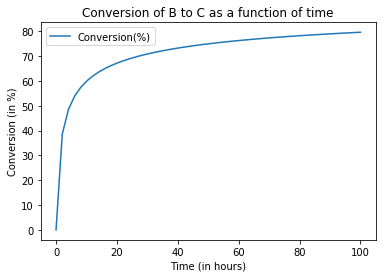

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

k = 0.6 # /hr
kd = 2  # /hr

t = np.linspace(0, 100)  # hr
x0 = 0

def X(x, t):
    dxdt = (100 - x) * [k / (1 + kd * t)]
    return dxdt

sol = odeint(X, x0, t)

# Graph
plt.plot(t, sol, label = 'Conversion(%)')
plt.title('Conversion of B to C as a function of time')
plt.xlabel('Time (in hours)')
plt.ylabel('Conversion (in %)')
plt.legend()
plt.show()

## If it takes two hours to reach 50% conversion and the fresh catalyst has a rate constant of 0.6/hr what is the actual $k_d$?

In [4]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import fsolve
from scipy.integrate import quad

Cb0 = 2 # M
k = 0.6 # /hr
tend = 2  # hr

def Int_X(x):
    return 1/ (100 - x)

I1, _ = quad(Int_X, 0, 50)
I1

def sol(kd):
    
    def Int_t(t):
        return k / (1 + kd * t)
    
    kspan = np.linspace(0, kd)
    I2, _ = quad(Int_t, 0, tend)
    z = I1 - I2
    
    return z

ans, = fsolve(sol, 0.8)
#ans = np.round(ans,3)
print(f'For the present scenario here, the reaction will take 2 hours to get\
 50% conversion if kd = {ans:1.3f}/hr')


For the present scenario here, the reaction will take 2 hours to get 50% conversion if kd = 0.877/hr


## Using $k_d$ from 1.3, how long does it take to reach 75% conversion?

In [5]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

k = 0.6 # /hr
kd = 2  # /hr

def X(x, t):
    dxdt = (100 - x) * [k / (1 + kd * t)]
    return dxdt

def f(t):
    tspan = np.linspace(0, t)
    x0 = 0
    sol = odeint(X, x0, tspan)
    z = 75 - sol
    return z[-1]


ans= fsolve(f, 4.0)
print(f'The reaction takes{ans[0]: 1.3f} hours to achieve 75% conversion')

The reaction takes 50.297 hours to achieve 75% conversion


## Say that we can stop the batch process after 2 hours, filter the spent catalyst, and replace with fresh catalyst. Solve and plot for $C_B(t)$ over 5 hours, and include the plot with the catalyst refresh. Include a legend on the plot to label each solution

For initial concentration of B = 1 M


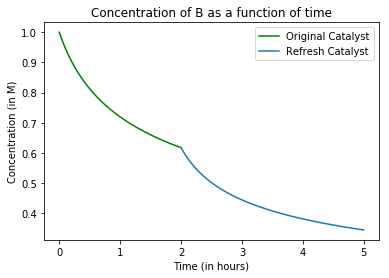

In [6]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

Cb0 = 1 # M
k = 0.6 # /hr
kd = 2  # /hr

t1 = np.linspace(0, 2)  # hr
x0 = 0

def X1(x, t1):
    dxdt1 = (1 - x) * [k / (1 + kd * t1)]
    return dxdt1

x1 = odeint(X1, x0, t1)
Cb1 = Cb0 * (1 - x1)

t2 = np.linspace(2, 5)

def X2(x, t2):
    dxdt2 = (1 - x) * [k / (1 + kd * (t2 - 2))]
    return dxdt2

x2 = odeint(X2, x0, t2)
Cb2 = Cb1[-1] * (1 - x2)

print('For initial concentration of B = 1 M')
# Graph
plt.plot(t1, Cb1, color = 'green', label='w')
plt.plot(t2, Cb2)
plt.title('Concentration of B as a function of time')
plt.xlabel('Time (in hours)')
plt.ylabel('Concentration (in M)')
plt.legend(['Original Catalyst', 'Refresh Catalyst'])
plt.show()

# Transient CSTR 

Consider a first-order liquid-phase elementary reaction in an isothermal CSTR
\begin{align*}
\ce{A ->[k] 2B}
\end{align*}
The feed concentration of A is $C_{Af}=2$mol/L, the volume of the reactor is 100 L, the flow rate is 3L/min, and the rate constant is $k=0.1$/min. 

## Write the mole balance for A in this reactor

\begin{align*}
\ce{A -> 2B}
\end{align*}

At t = 0:    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $N_{Af}$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0

At t = t:    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$N_{Af} - \Delta N_A$ &nbsp; $2\Delta N_A$

The mole balance between A and B is:
<center> $\displaystyle -2 \frac{dN_A}{dt} = \frac{dN_B}{dt} $

In this transient CSTR,
<center> Accumulation = Feed in - Feed out + Generation
<center> $\displaystyle \frac{dN_A}{dt} = FC_{Af} - FC_A + r_A V $

Being first order, $r_A = -kC_A$
<center> $\displaystyle\therefore \frac{dC_A}{dt} = \frac{F}{V}(C_{Af} - C_A) - kC_A  $


## Find the steady state concentration of A

In [7]:
V = 100 # L
F = 3   # L/min
k = 0.1 # /min
C_Af = 2 # mol/L

tao = V / F  # min

def f(C_A):
    z = C_A - C_Af + k * C_A * tao
    return z

ssconc, = fsolve(f, 2.0, full_output=0)
print('The steady state concentration of A is:', f'{ssconc:1.3f}', 'mol/L.')


The steady state concentration of A is: 0.462 mol/L.


## Plot the concentration of A versus time for constant feed concentration if initial concentration of A and B is 0 mol/L over 20 hours. Also include a horizontal black dashed line indicating the steady state concentration.

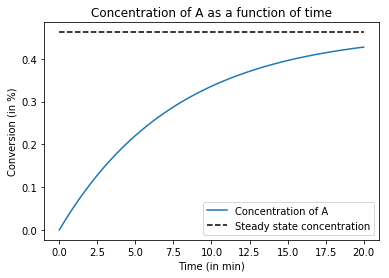

In [8]:
import numpy as np

C_A0 = 0
t = np.linspace(0, 20)   # min

def g(C_A, t):
    dCAdt = (C_Af - C_A) / tao - k * C_A
    return dCAdt

concA = odeint(g, C_A0, t)

# Graph
plt.plot(t, concA, label = 'Concentration of A')
plt.plot(t,t*0+0.462,'--k', label = 'Steady state concentration')
plt.title('Concentration of A as a function of time')
plt.xlabel('Time (in min)')
plt.ylabel('Conversion (in %)')
plt.legend()
plt.show()

## Plot the concentration of A versus time for constant feed concentration if initial concentration of A and B is 2 mol/L

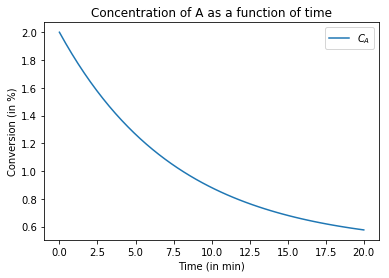

In [9]:
import numpy as np

C_A0 = 2
t = np.linspace(0, 20)  # min

def g(C_A, t):
    dCAdt = (C_Af - C_A) / tao - k * C_A
    return dCAdt

concA = odeint(g, C_A0, t)

# Graph
plt.plot(t, concA, label = '$C_A$')
plt.title('Concentration of A as a function of time')
plt.xlabel('Time (in min)')
plt.ylabel('Conversion (in %)')
plt.legend()
plt.show()

## For 2.3, how long does it take to reach 75% of the steady state conversion?

In [11]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

V = 100 # L
F = 3   # L/min
k = 0.1 # /min
C_Af = 2 # mol/L

tao = V / F
Creq = 0.75 * ssconc

def g(C_A, t):
    dCAdt = (C_Af - C_A) / tao - k * C_A
    return dCAdt

def h(t):
    tspan = np.linspace(0, t)
    C_A0 = 0
    concA = odeint(g, C_A0, tspan)
    z = Creq - concA
    return z[-1]

ans, = fsolve(h, 6)
print(f'It takes {ans:1.3f} minutes to achieve 75% of the steady state \
conversion.')


It takes 10.664 minutes to achieve 75% of the steady state conversion.
